In [3]:
### bibliotecas base
import pandas as pd
import numpy as np
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat

In [34]:
enem_json = pd.read_json('enem_2023.json')

In [140]:
enem_json.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


1. Qual das disciplinas tem a maior amplitude de notas?

In [71]:
enem_json.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [47]:
def amplitudes(df):
    df1 = df.describe()
    df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
    return df1

In [48]:
amplitudes(enem_json)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,898.000000,937.000000,825.000000,925.000000,861.000000
mean,514.763824,527.257988,499.594182,536.174519,637.889660
std,84.267418,78.049742,79.118314,86.833854,115.314951
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.375823,475.479896,444.712664,479.229225,556.576045
50%,515.054794,524.644343,500.515128,533.327963,635.352116
75%,571.686308,582.024626,548.755893,593.498876,716.006726
max,804.456317,763.919695,802.004568,807.877902,1000.000000
amplitude,517.456317,474.019695,487.604568,488.077902,729.160035


In [93]:
def maior_amplitudes(df):
    df1 = df.describe()
    df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
    max_amplitude = df1.loc["amplitude"].max()
    coluna = df1.columns[df1.isin([max_amplitude]).any()]
    return print(f"A maior amplitude é {max_amplitude} que fica na coluna {coluna}")

In [94]:
maior_amplitudes(enem_json)

A maior amplitude é 729.1600351395 que fica na coluna Index(['Redação'], dtype='object')


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [84]:
enem_tendencias = enem_json.dropna(subset=["Linguagens", "Ciências humanas", "Ciências da natureza", "Matemática", "Redação"])

In [85]:
enem_tendencias = enem_tendencias.drop(columns=["Sexo"])

In [73]:
enem_tendencias.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048
5,616.043360,502.007005,497.777935,615.902547,507.365147


In [166]:
# print(enem_tendencias[0:].mean())
#Utilizado para comparar se os resultados futuros estão certos
    

In [167]:
#print(enem_tendencias[0:].median())
#Utilizado para comparar se os resultados futuros estão certos

In [134]:
enem_tendencias2 = pd.DataFrame()

In [135]:
enem_tendencias2["Matéria"] = list(enem_tendencias.columns)

In [161]:
lista_medias = []
for coluna in enem_tendencias.columns:
   lista_medias.append(enem_tendencias[coluna].mean())
print(lista_medias)

[517.8527593569739, 528.7172257655019, 502.55561254809635, 537.5221838924026, 641.3533546317391]


In [162]:
enem_tendencias2["Média"] = lista_medias

In [163]:
lista_medianas = []
for coluna in enem_tendencias.columns:
   lista_medianas.append(enem_tendencias[coluna].median())
print(lista_medianas)

[517.178027429, 529.3825907453, 502.9893551355, 533.1154142782, 639.6168325324]


In [164]:
enem_tendencias2["Mediana"] = lista_medianas

In [165]:
enem_tendencias2.head()

,Matéria,Média,Mediana
0,Linguagens,517.852759,517.178027
1,Ciências humanas,528.717226,529.382591
2,Ciências da natureza,502.555613,502.989355
3,Matemática,537.522184,533.115414
4,Redação,641.353355,639.616833


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:
a. Redação - 2
b. Matemática e suas Tecnologias - 4
c. Linguagens, Códigos e suas Tecnologias - 2
d. Ciências Humanas e suas Tecnologias - 1
e. Ciências da Natureza e suas Tecnologias - 1
Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?

In [168]:
enem_tendencias.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048
5,616.043360,502.007005,497.777935,615.902547,507.365147


In [179]:
enem_ponderado = enem_tendencias

In [174]:
enem_ponderado["Linguagens"] = enem_ponderado["Linguagens"] * 2

In [181]:
enem_ponderado["Matemática"] = enem_ponderado["Matemática"] * 4
enem_ponderado["Redação"] = enem_ponderado["Redação"] * 2

In [212]:
enem_ponderado =  enem_ponderado.drop(['Amplitude'], axis=0)

In [224]:
enem_ponderado.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Média ponderada
0,1171.338599,686.512178,390.482473,1809.125330,1092.743412,515.020199
2,1245.464768,495.510719,443.183580,2678.733603,1369.031501,623.192417
3,700.329209,602.041588,413.979810,2706.435806,1342.474229,576.526064
4,768.187315,489.249140,609.758123,2081.706791,1488.750095,543.765146
5,1232.086720,502.007005,497.777935,2463.610189,1014.730294,571.021214


In [197]:
enem_ponderado["Média ponderada"] = enem_ponderado.loc[0:].sum(axis=1) / 10

In [231]:
enem_ponderado["Média ponderada"].sort_values(ascending=False).head(500)

25     682.987732
824    680.103191
702    671.265814
129    664.384364
60     658.597791
          ...    
400    491.878059
160    491.409454
529    491.032952
386    490.069750
384    489.969900
Name: Média ponderada, Length: 500, dtype: float64

In [227]:
enem_ponderado["Média ponderada"].sort_values(ascending=False).head(500).mean() #média dos 500 alunos mais bem colocados

557.2896772018769

In [228]:
enem_ponderado["Média ponderada"].sort_values(ascending=False).head(500).std() #desvio padrão dos 500 alunos mais bem colocados

40.435866299464266

4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [232]:
enem_ponderado["Média ponderada"].sort_values(ascending=False).head(40).mean() #média dos 40 alunos mais bem colocados

636.6827415075188

In [233]:
enem_ponderado["Média ponderada"].sort_values(ascending=False).head(40).var() #variância dos 40 alunos mais bem colocados

295.76750360041024

5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [241]:
enem_tendencias[["Matemática", "Linguagens"]].describe()

,Matemática,Linguagens
count,549.000000,549.000000
mean,537.522184,517.852759
std,88.152197,82.534564
min,319.800000,287.000000
25%,477.066328,462.664147
50%,533.115414,517.178027
75%,591.639725,572.939036
max,807.877902,804.456317


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?
R: Linguages é assimétrico, Redação não.

In [243]:
enem_tendencias.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048
5,616.043360,502.007005,497.777935,615.902547,507.365147


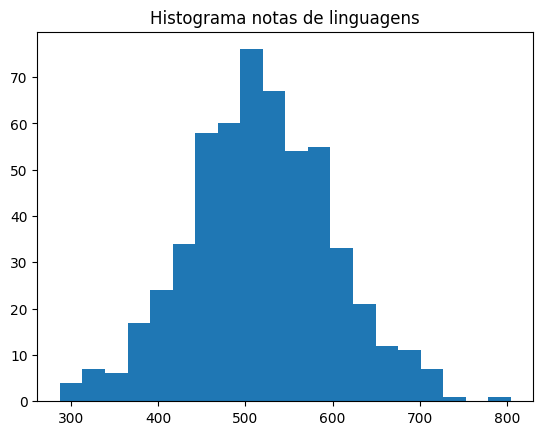

In [7]:
plt.hist(enem_tendencias["Linguagens"], bins = 20)
plt.title("Histograma notas de linguagens")
plt.show() 

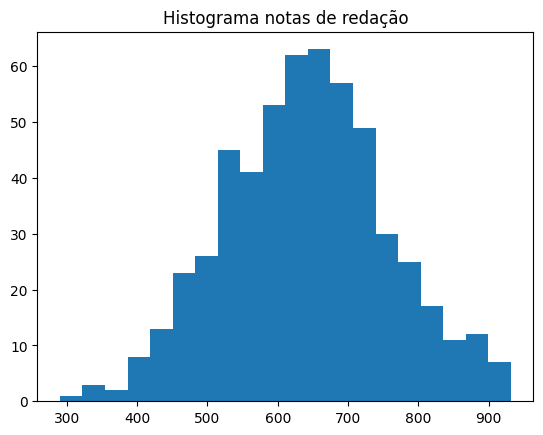

In [8]:
plt.hist(enem_tendencias["Redação"], bins = 20)
plt.title("Histograma notas de redação")
plt.show() 

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])
R: Ambos ficam assimétricos

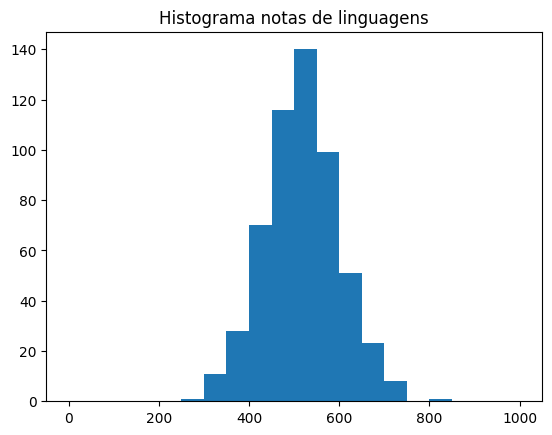

In [9]:
plt.hist(enem_tendencias["Linguagens"], bins = 20, range=[0, 1000])
plt.title("Histograma notas de linguagens")
plt.show() 

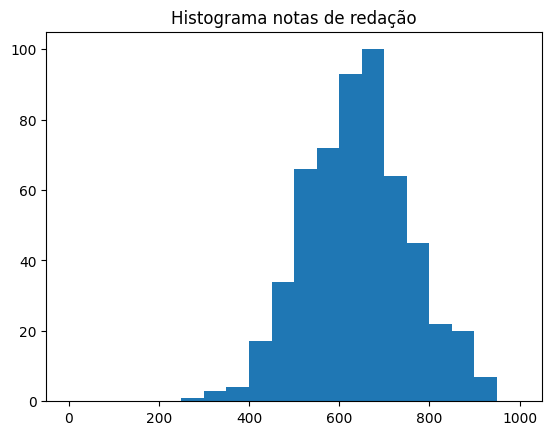

In [10]:
plt.hist(enem_tendencias["Redação"], bins = 20, range=[0, 1000])
plt.title("Histograma notas de redação")
plt.show() 

8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.


Text(0.5, 1.0, 'Boxplot: Redação')

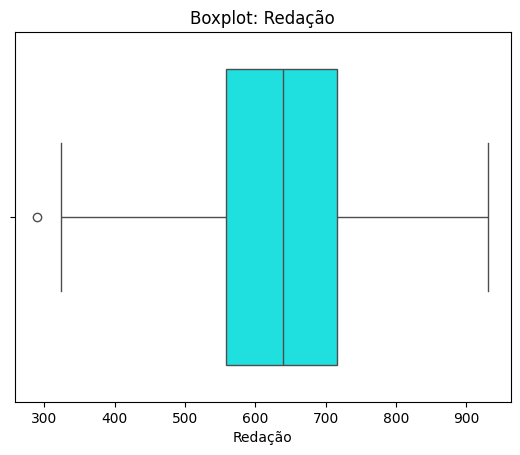

In [11]:
plt.figure()
sns.boxplot(data = enem_tendencias , x = "Redação", color='cyan',showfliers=True)
plt.title("Boxplot: Redação")

Text(0.5, 1.0, 'Boxplot: Ciências humanas')

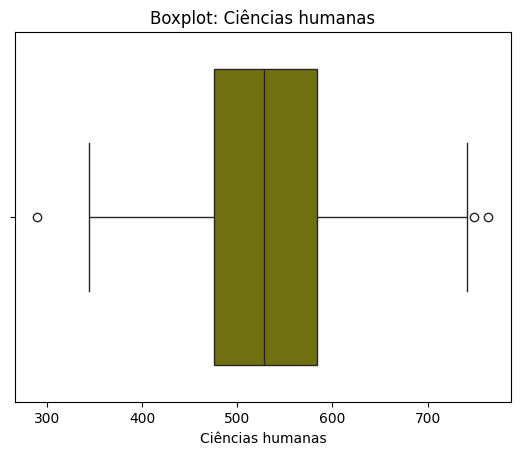

In [12]:
plt.figure()
sns.boxplot(data = enem_tendencias , x = "Ciências humanas", color='olive',showfliers=True)
plt.title("Boxplot: Ciências humanas")

Text(0.5, 1.0, 'Boxplot: Ciências da natureza')

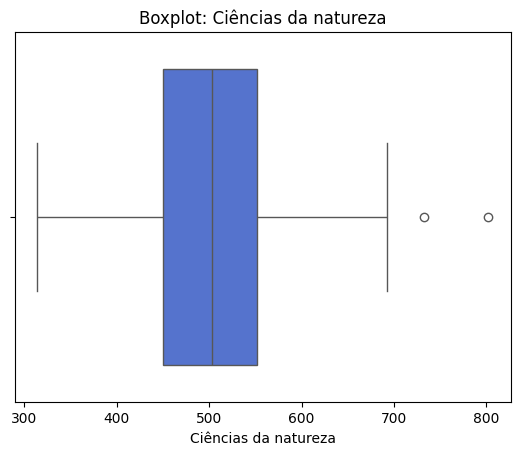

In [13]:
plt.figure()
sns.boxplot(data = enem_tendencias , x = "Ciências da natureza", color='royalblue',showfliers=True)
plt.title("Boxplot: Ciências da natureza")

In [14]:
def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    # calcula  IQR
    iqr = q75 - q25
    # calcula outlier cutoff
    cut_off = iqr * 1.5
    # calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print(' IQR é ',iqr)
   # print('Valor minimo', lower)
   # print('Valor maximo', upper)
    outliers = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
    print('O numero de outliers encontrado foi de', len(outliers))
    return lower, upper, outliers

In [20]:
find_outlier_iqr(enem_tendencias, "Ciências da natureza")

 IQR é  102.26240025932503
O numero de outliers encontrado foi de 2


(296.6045346095625, 705.6541356468626, [802.0045683513, 732.5029639878])

 IQR é  102.26240025932503
O numero de outliers encontrado foi de 2


<Figure size 1000x600 with 0 Axes>

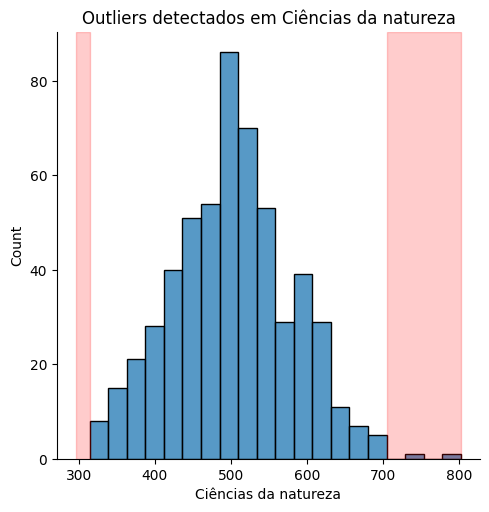

In [17]:
lower, upper, out =  find_outlier_iqr(enem_tendencias, "Ciências da natureza")
if (len(out) > 0):
   plt.figure(figsize = (10,6))
   sns.displot(enem_tendencias["Ciências da natureza"], kde=False)
   plt.axvspan(xmin = lower,xmax= enem_tendencias["Ciências da natureza"].min(),alpha=0.2, color='red')
   plt.axvspan(xmin = upper,xmax= enem_tendencias["Ciências da natureza"].max(),alpha=0.2, color='red')
   plt.title("Outliers detectados em {}".format("Ciências da natureza"))

In [21]:
find_outlier_iqr(enem_tendencias, "Ciências humanas")

 IQR é  108.25660959517495
O numero de outliers encontrado foi de 3


(313.4737071952626, 746.5001455759624, [748.8395773643, 763.9196954613, 289.9])

 IQR é  108.25660959517495
O numero de outliers encontrado foi de 3


<Figure size 1000x600 with 0 Axes>

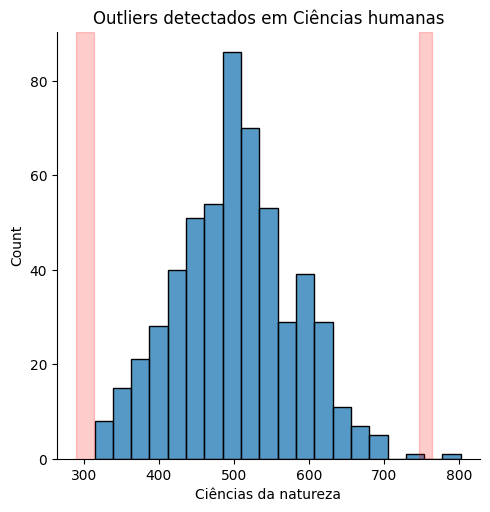

In [18]:
lower, upper, out =  find_outlier_iqr(enem_tendencias, "Ciências humanas")
if (len(out) > 0):
   plt.figure(figsize = (10,6))
   sns.displot(enem_tendencias["Ciências da natureza"], kde=False)
   plt.axvspan(xmin = lower,xmax= enem_tendencias["Ciências humanas"].min(),alpha=0.2, color='red')
   plt.axvspan(xmin = upper,xmax= enem_tendencias["Ciências humanas"].max(),alpha=0.2, color='red')
   plt.title("Outliers detectados em {}".format("Ciências humanas"))

In [22]:
find_outlier_iqr(enem_tendencias, "Redação")

 IQR é  157.02513490047488
O numero de outliers encontrado foi de 1


(322.98725564181274, 951.0877952437122, [290.3086081677])

 IQR é  157.02513490047488
O numero de outliers encontrado foi de 1


<Figure size 1000x600 with 0 Axes>

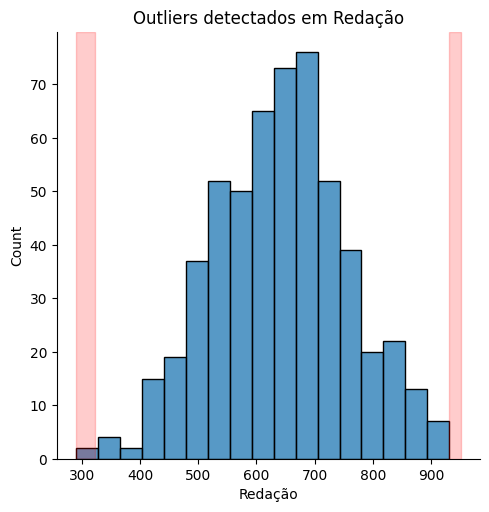

In [19]:
lower, upper, out =  find_outlier_iqr(enem_tendencias, "Redação")
if (len(out) > 0):
   plt.figure(figsize = (10,6))
   sns.displot(enem_tendencias["Redação"], kde=False)
   plt.axvspan(xmin = lower,xmax= enem_tendencias["Redação"].min(),alpha=0.2, color='red')
   plt.axvspan(xmin = upper,xmax= enem_tendencias["Redação"].max(),alpha=0.2, color='red')
   plt.title("Outliers detectados em {}".format("Redação"))

9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)
R: Não, a alteração na média foi de no máximo 1%.

In [101]:
enem_tendencias.mean()

Linguagens              517.467162
Ciências humanas        528.351454
Ciências da natureza    502.142101
Matemática              537.172480
Redação                 641.193123
dtype: float64

In [97]:
enem_outlier_redacao = enem_tendencias

In [98]:
enem_outlier_redacao = enem_outlier_redacao[enem_outlier_redacao.Redação != 290.3086081677]

In [100]:
enem_outlier_redacao["Redação"].mean()

641.8345942404343

In [102]:
enem_outlier_natureza = enem_tendencias

In [103]:
outliers_natureza = (802.0045683513, 732.5029639878)

In [105]:
enem_outlier_natureza = enem_outlier_natureza[enem_outlier_natureza["Ciências da natureza"].isin(outliers_natureza) == False]

In [106]:
enem_outlier_natureza["Ciências da natureza"].mean()

501.17099582678804

In [110]:
enem_outlier_humanas = enem_tendencias

In [111]:
outliers_humanas = [748.8395773643, 763.9196954613, 289.9]

In [113]:
enem_outlier_humanas = enem_outlier_humanas[enem_outlier_humanas["Ciências humanas"].isin(outliers_humanas) == False]

In [114]:
enem_outlier_humanas["Ciências humanas"].mean()

527.9521791510007

In [136]:
def porcentagem_diferenca(val1, val2):
    diferenca = abs(val1 - val2)
    media = (val1 + val2) / 2
    porcentagem = diferenca / media * 100
    return print(f"A diferença dos dois valores é de aproximadamente {porcentagem:.4f}%.")

In [137]:
porcentagem_diferenca(enem_tendencias["Redação"].mean(), enem_outlier_redacao["Redação"].mean())

A diferença dos dois valores é de aproximadamente 0.1000%.


In [138]:
porcentagem_diferenca(enem_tendencias["Ciências da natureza"].mean(), enem_outlier_redacao["Ciências da natureza"].mean())

A diferença dos dois valores é de aproximadamente 0.0233%.


In [139]:
porcentagem_diferenca(enem_tendencias["Ciências humanas"].mean(), enem_outlier_redacao["Ciências humanas"].mean())

A diferença dos dois valores é de aproximadamente 0.0114%.


10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão

R: A substituição pela média não altera a média geral

In [159]:
enem_json.mean(numeric_only=True)

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [254]:
def substituicao_media(database):
    for coluna in database.columns:
        media = database[coluna].mean()
        database.head()
        database[coluna] = database[coluna].fillna(media)
    return database.mean()

In [257]:
def substituicao_mediana(database):
    for coluna in database.columns:
        mediana = database[coluna].median()
        database[coluna] = database[coluna].fillna(mediana)
    return database.mean()

In [268]:
def substituicao_moda(database):
    for coluna in database.columns:
        moda = database[coluna].mode()[0]
        database[coluna] = database[coluna].fillna(moda)
    return database.mean()

In [252]:
enem_substituicao_medias = enem_json.drop(columns=["Sexo"])

In [260]:
enem_substituicao_mediana = enem_json.drop(columns=["Sexo"])

In [269]:
enem_substituicao_moda = enem_json.drop(columns=["Sexo"])

In [255]:
substituicao_media(enem_substituicao_medias)

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [261]:
substituicao_mediana(enem_substituicao_mediana)

Linguagens              514.578415
Ciências humanas        526.880850
Ciências da natureza    499.520391
Matemática              535.759100
Redação                 637.432194
dtype: float64

In [270]:
substituicao_moda(enem_substituicao_moda)

Linguagens              491.089754
Ciências humanas        511.865175
Ciências da natureza    466.770440
Matemática              519.537070
Redação                 586.411433
dtype: float64

In [235]:
enem_json.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [271]:
enem_substituicao_medias.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
1,359.384608,642.084134,499.315583,412.205207,741.825256
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048


In [272]:
enem_substituicao_mediana.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
1,359.384608,642.084134,500.479263,412.205207,741.825256
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048


In [273]:
enem_substituicao_moda.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
1,359.384608,642.084134,314.400000,412.205207,741.825256
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048


In [274]:
def porcentagem_diferenca_colunas(database1, database2):
    for coluna in database1.columns:
        diferenca = abs(database1[coluna].mean() - database2[coluna].mean())
        media = (database1[coluna].mean() + database2[coluna].mean()) / 2
        porcentagem = diferenca / media * 100
        print(f"A diferença da média das duas colunas é de aproximadamente {porcentagem:.4f}%.")
    return 

In [275]:
porcentagem_diferenca_colunas(enem_substituicao_medias, enem_json)

A diferença da média das duas colunas é de aproximadamente 0.0000%.
A diferença da média das duas colunas é de aproximadamente 0.0000%.
A diferença da média das duas colunas é de aproximadamente 0.0000%.
A diferença da média das duas colunas é de aproximadamente 0.0000%.
A diferença da média das duas colunas é de aproximadamente 0.0000%.


In [277]:
porcentagem_diferenca_colunas(enem_substituicao_mediana, enem_json)

A diferença da média das duas colunas é de aproximadamente 0.0104%.
A diferença da média das duas colunas é de aproximadamente 0.0306%.
A diferença da média das duas colunas é de aproximadamente 0.0410%.
A diferença da média das duas colunas é de aproximadamente 0.0385%.
A diferença da média das duas colunas é de aproximadamente 0.0551%.


In [278]:
porcentagem_diferenca_colunas(enem_substituicao_moda, enem_json)

A diferença da média das duas colunas é de aproximadamente 4.6608%.
A diferença da média das duas colunas é de aproximadamente 2.9217%.
A diferença da média das duas colunas é de aproximadamente 6.7375%.
A diferença da média das duas colunas é de aproximadamente 3.1129%.
A diferença da média das duas colunas é de aproximadamente 8.3928%.
